In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from environment import TrafficModel, Car
from util.network import create_random_grid_network, OneXLatencyGenerator

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Debugging

In [ ]:
network.edges

In [ ]:
number_of_steps = 10

network = create_random_grid_network(3, 4, OneXLatencyGenerator(capacity=2))
cars = {
    0: Car(0, (0, 0), (2, 3), 1, anticipation_strategy='edge', position=(((0, 0), (0, 1)), 0), verbose=True),
    1: Car(1, (0, 0), (2, 3), 1, anticipation_strategy='edge', position=(((0, 0), (1, 0)), 0), verbose=True)
}

model = TrafficModel(network, cars)

step_stats, car_stats = model.run_sequentially(number_of_steps)

In [ ]:
step_stats

In [ ]:
car_stats

In [ ]:
car_stats.groupby('route').count()

In [ ]:
step_stats['flow'].plot()

### Single Braess

In [ ]:
def get_cars():
    return {
             0: Car( 0, 0, 3, 1/4, position=((0, 1), 0 / 4)),
             1: Car( 1, 0, 3, 1/4, position=((0, 1), 1 / 4)),
             2: Car( 2, 0, 3, 1/4, position=((0, 1), 2 / 4)),
             3: Car( 3, 0, 3, 1/4, position=((0, 1), 3 / 4)),
             4: Car( 4, 0, 3, 1/11, position=((1, 3), 0 / 11)),
             5: Car( 5, 0, 3, 1/11, position=((1, 3), 1 / 11)),
             6: Car( 6, 0, 3, 1/11, position=((1, 3), 2 / 11)),
             7: Car( 7, 0, 3, 1/11, position=((1, 3), 3 / 11)),
             8: Car( 8, 0, 3, 1/11, position=((1, 3), 4 / 11)),
             9: Car( 9, 0, 3, 1/11, position=((1, 3), 5 / 11)),
            10: Car(10, 0, 3, 1/11, position=((1, 3), 6 / 11)),
            11: Car(11, 0, 3, 1/11, position=((1, 3), 7 / 11)),
            12: Car(12, 0, 3, 1/11, position=((1, 3), 8 / 11)),
            13: Car(13, 0, 3, 1/11, position=((1, 3), 9 / 11)),
            14: Car(14, 0, 3, 1/11, position=((1, 3), 10 / 11)),
            15: Car(15, 0, 3, 1/11, position=((0, 2), 0 / 11)),
            16: Car(16, 0, 3, 1/11, position=((0, 2), 1 / 11)),
            17: Car(17, 0, 3, 1/11, position=((0, 2), 2 / 11)),
            18: Car(18, 0, 3, 1/11, position=((0, 2), 3 / 11)),
            19: Car(19, 0, 3, 1/11, position=((0, 2), 4 / 11)),
            20: Car(20, 0, 3, 1/11, position=((0, 2), 5 / 11)),
            21: Car(21, 0, 3, 1/11, position=((0, 2), 6 / 11)),
            22: Car(22, 0, 3, 1/11, position=((0, 2), 7 / 11)),
            23: Car(23, 0, 3, 1/11, position=((0, 2), 8 / 11)),
            24: Car(24, 0, 3, 1/11, position=((0, 2), 9 / 11)),
            25: Car(25, 0, 3, 1/11, position=((0, 2), 10 / 11)),
            26: Car(26, 0, 3, 1/4, position=((2, 3), 0 / 4)),
            27: Car(27, 0, 3, 1/4, position=((2, 3), 1 / 4)),
            28: Car(28, 0, 3, 1/4, position=((2, 3), 2 / 4)),
            29: Car(29, 0, 3, 1/4, position=((2, 3), 3 / 4)),
        }
number_of_steps = 1000

In [ ]:
number_of_steps = 1000

mean_travel_times_allowed = []
mean_travel_times_prohibited = []
for capacity in range(2, 30):
    for allowed_edge in [True, False]:
        model = TrafficModel(create_braess_network(capacity=capacity), get_cars())
        model.set_edge_restriction((1, 2), allowed=allowed_edge)
        step_stats, car_stats = model.run_sequentially(number_of_steps)

        if allowed_edge:
            mean_travel_times_allowed.append((-car_stats["travel_time"]).mean())
        else:
            mean_travel_times_prohibited.append((-car_stats["travel_time"]).mean())

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(10)
ax1.plot(range(2,30), pd.DataFrame({'allowed': mean_travel_times_allowed, 'prohibited': mean_travel_times_prohibited}))
ax1.set_title('Mean Travel Times')

improvement = np.array(mean_travel_times_prohibited) - np.array(mean_travel_times_allowed)
ax2.plot(range(2,30), improvement)
ax2.set_title('Improvement')

plt.show()

print(f'Best improvement found with capacity: {np.argmax(improvement) + 2}')

In [ ]:
model = TrafficModel(create_braess_network(capacity=13), get_cars())
model.set_edge_restriction((1, 2), allowed=True)
step_stats, car_stats = model.run_sequentially(number_of_steps)

In [ ]:
(-car_stats["travel_time"]).mean()

In [ ]:
car_stats.groupby('route').count()

In [ ]:
step_stats

### Double Braess

In [ ]:
def get_cars(capacity=100):
    return {
    # A -> 0
    1: Car(1, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=(('A', 0), 0)),
    2: Car(2, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=(('A', 0), (1/(2 + (6 / capacity) * 4)) * 0.25)),
    3: Car(3, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=(('A', 0), (1/(2 + (6 / capacity) * 4)) * 0.5)),
    4: Car(4, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=(('A', 0), (1/(2 + (6 / capacity) * 4)) * 0.75)),
    # 0 -> 1
    5: Car(5, 0, 3, 1/(2 + (6 / capacity) * 4), position=((0, 1), 0)),
    6: Car(6, 0, 3, 1/(2 + (6 / capacity) * 4), position=((0, 1), (1/(2 + (6 / capacity) * 4)) * 0.25)),
    7: Car(7, 0, 3, 1/(2 + (6 / capacity) * 4), position=((0, 1), (1/(2 + (6 / capacity) * 4)) * 0.5)),
    8: Car(8, 0, 3, 1/(2 + (6 / capacity) * 4), position=((0, 1), (1/(2 + (6 / capacity) * 4)) * 0.75)),
    # 2 -> 3
    9: Car(9, 0, 3, 1/(2 + (6 / capacity) * 4), position=((2, 3), 0)),
    10: Car(10, 0, 3, 1/(2 + (6 / capacity) * 4), position=((2, 3), (1/(2 + (6 / capacity) * 4)) * 0.25)),
    11: Car(11, 0, 3, 1/(2 + (6 / capacity) * 4), position=((2, 3), (1/(2 + (6 / capacity) * 4)) * 0.5)),
    12: Car(12, 0, 3, 1/(2 + (6 / capacity) * 4), position=((2, 3), (1/(2 + (6 / capacity) * 4)) * 0.75)),
    # 0 -> 2
    13: Car(13, 0, 3, 1/10, position=((0, 2), 0)),
    14: Car(14, 0, 3, 1/10, position=((0, 2), 0.5)),
    # 1 -> 3
    15: Car(15, 0, 3, 1/10, position=((1, 3), 0)),
    16: Car(16, 0, 3, 1/10, position=((1, 3), 0.5)),
    # 2 -> B
    17: Car(17, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=((2, 'B'), 0)),
    18: Car(18, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=((2, 'B'), (1/(2 + (6 / capacity) * 4)) * 0.25)),
    19: Car(19, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=((2, 'B'), (1/(2 + (6 / capacity) * 4)) * 0.5)),
    20: Car(20, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=(('A', 0), (1/(2 + (6 / capacity) * 4)) * 0.75 )),
    # A -> 2
    21: Car(21, 'A', 'B', 1/19, position=(('A', 2), 0)),
    22: Car(22, 'A', 'B', 1/19, position=(('A', 2), (1 / 19) * 0.25)),
    # 0 -> B
    23: Car(23, 'A', 'B', 1/19, position=((0, 'B'), 0)),
    24: Car(24, 'A', 'B', 1/19, position=((0, 'B'), (1 / 19) * 0.25))
}

In [ ]:
number_of_steps = 1000

mean_travel_times_allowed = []
mean_travel_times_prohibited = []
for capacity in range(2, 30):
    for allowed_edge in [True, False]:
        model = TrafficModel(create_double_braess_network(capacity=capacity), get_cars())
        model.set_edge_restriction((1, 2), allowed=allowed_edge)
        step_stats, car_stats = model.run_sequentially(number_of_steps)

        if allowed_edge:
            mean_travel_times_allowed.append((-car_stats["travel_time"]).mean())
        else:
            mean_travel_times_prohibited.append((-car_stats["travel_time"]).mean())

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(10)
ax1.plot(range(2,30), pd.DataFrame({'allowed': mean_travel_times_allowed, 'prohibited': mean_travel_times_prohibited}))
ax1.set_title('Mean Travel Times')

improvement = np.array(mean_travel_times_prohibited) - np.array(mean_travel_times_allowed)
ax2.plot(range(2,30), improvement)
ax2.set_title('Improvement')

plt.show()

print(f'Best improvement found with capacity: {np.argmax(improvement) + 2}')

In [ ]:
model = TrafficModel(create_double_braess_network(capacity=6), get_cars(capacity=6))
model.set_edge_restriction((0, 2), allowed=False)
model.set_edge_restriction((1, 2), allowed=False)
step_stats, car_stats = model.run_sequentially(number_of_steps)

In [ ]:
(-car_stats["travel_time"]).mean()

In [ ]:
car_stats.groupby('route').count()

In [ ]:
car_stats.groupby(["route"])["travel_time"].mean()

# Playground

In [3]:
from util.network import create_random_gnp_graph, UniformLatencyGenerator
from util.analysis import draw_latency_params
from environment import TrafficModel

network = create_random_gnp_graph(5, 0.5, UniformLatencyGenerator(0, 1, 0, 1, 1, 2, integer=True, seed=1), seed=43)
network.edges(data='latency_params')

OutEdgeDataView([(0, 1, (1, 1, 1)), (0, 3, (0, 1, 2)), (0, 4, (1, 1, 2)), (1, 3, (0, 0, 2)), (1, 4, (0, 1, 2)), (2, 0, (0, 0, 2)), (2, 1, (0, 0, 1)), (2, 3, (1, 0, 1)), (3, 2, (1, 0, 1)), (3, 4, (0, 1, 1)), (4, 2, (0, 0, 2)), (4, 3, (1, 1, 2))])

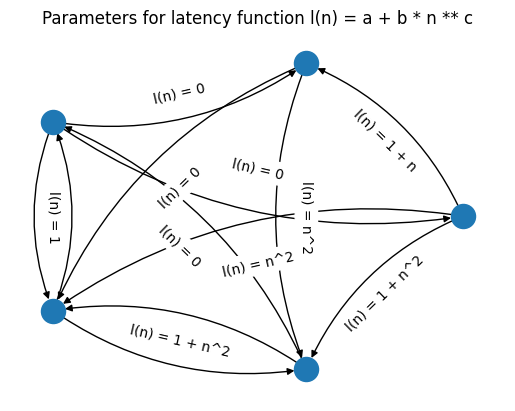

In [4]:
draw_latency_params(TrafficModel(network, {0: None}))

In [ ]:
(a, b, c) = (0, 1, 1)

In [ ]:
import math



In [ ]:
get_latency_label(a, b, c)